# Make .npy dataset

In [1]:
working_dir = '/Volumes/Samsung_T5/WeatherNet/Make_NP_DataSet'
data_dir = '/Volumes/Samsung_T5/WeatherNet/data'

## Import modules

In [2]:
import os 
import shutil
import glob
from tqdm import trange
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
data_npy_path = working_dir+"/data_npy"
os.mkdir(data_npy_path)

In [4]:
os.chdir(data_dir)
os.system("dot_clean ")

256

In [5]:
os.mkdir(data_npy_path+"/train")
os.mkdir(data_npy_path+"/val")
os.mkdir(data_npy_path+"/test")

In [6]:
os.mkdir(data_npy_path+"/train/flir")
os.mkdir(data_npy_path+"/train/top")
os.mkdir(data_npy_path+"/train/bottom")

os.mkdir(data_npy_path+"/val/flir")
os.mkdir(data_npy_path+"/val/top")
os.mkdir(data_npy_path+"/val/bottom")

os.mkdir(data_npy_path+"/test/flir")
os.mkdir(data_npy_path+"/test/top")
os.mkdir(data_npy_path+"/test/bottom")

## Make train npy

In [7]:
train_bottom_path_npy = working_dir + "/data_npy/train/bottom"

train_flir_path_npy = working_dir + "/data_npy/train/flir"

train_top_path_npy = working_dir + "/data_npy/train/top"

In [8]:
train_bottom_path = working_dir + "/data/train/bottom"
train_bottom_low = train_bottom_path + "/low"
train_bottom_mid = train_bottom_path + "/mid"
train_bottom_high = train_bottom_path + "/high"

train_flir_path = working_dir + "/data/train/flir"
train_flir_low = train_flir_path + "/low"
train_flir_mid = train_flir_path + "/mid"
train_flir_high = train_flir_path + "/high"

train_top_path = working_dir + "/data/train/top"
train_top_low = train_top_path + "/low"
train_top_mid = train_top_path + "/mid"
train_top_high = train_top_path + "/high"

In [9]:
def convert_pic_seq(path,npy_path):
    files = glob.glob(path+"/*.jpg")
    files.sort()

    for i in trange(0,len(files),n_frames):
        label,name = files[i].split("/")[-2:]
        name = name.split("_")[:-1]
        name = "_".join(name)
        seq = files[i:i+n_frames]
        pics = []
        for j,pic_path in enumerate(seq):
            im = Image.open(pic_path)  
            if im.size != (img_height,img_width):
                im = im.resize((img_height,img_width))
            im2arr = np.array(im)    
            im2arr = im2arr.reshape(3,img_height,img_width)
            pics.append(im2arr) 
        pics = np.stack(pics)    
        np.save(npy_path+"/"+name+"_"+label, pics)

In [10]:
n_frames = 6
img_height = 480
img_width = 640

In [11]:
convert_pic_seq(train_bottom_low,train_bottom_path_npy)

100%|██████████| 453/453 [04:29<00:00,  1.67it/s]


### View image set

In [13]:
pic_seq =np.load('/Volumes/Samsung_T5/WeatherNet/Make_NP_DataSet/data_npy/train/bottom/2020_01_23_01_low.npy')

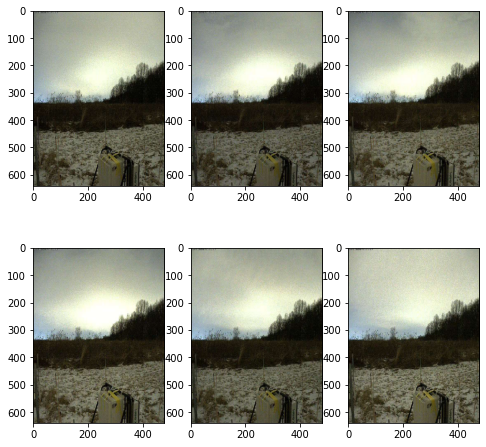

In [16]:
fig=plt.figure(figsize=(8,8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(pic_seq[i-1,:,:,:].reshape(img_width,img_height,3))
plt.show()

#### Looking good!

In [17]:
convert_pic_seq(train_top_low,train_top_path_npy)

100%|██████████| 453/453 [01:45<00:00,  4.28it/s]


In [18]:
convert_pic_seq(train_flir_low,train_flir_path_npy)

100%|██████████| 453/453 [03:37<00:00,  2.03it/s]


## Make val npy

In [19]:
val_bottom_path_npy = working_dir + "/data_npy/val/bottom"

val_flir_path_npy = working_dir + "/data_npy/val/flir"

val_top_path_npy = working_dir + "/data_npy/val/top"

val_bottom_path = working_dir + "/data/val/bottom"
val_bottom_low = val_bottom_path + "/low"
val_bottom_mid = val_bottom_path + "/mid"
val_bottom_high = val_bottom_path + "/high"

val_flir_path = working_dir + "/data/val/flir"
val_flir_low = val_flir_path + "/low"
val_flir_mid = val_flir_path + "/mid"
val_flir_high = val_flir_path + "/high"

val_top_path = working_dir + "/data/val/top"
val_top_low = val_top_path + "/low"
val_top_mid = val_top_path + "/mid"
val_top_high = val_top_path + "/high"

In [20]:
convert_pic_seq(val_bottom_low,val_bottom_path_npy)
convert_pic_seq(val_top_low,val_top_path_npy)
convert_pic_seq(val_flir_low,val_flir_path_npy)

100%|██████████| 266/266 [02:09<00:00,  2.01it/s]


## Make test npy

In [21]:
test_bottom_path_npy = working_dir + "/data_npy/test/bottom"

test_flir_path_npy = working_dir + "/data_npy/test/flir"

test_top_path_npy = working_dir + "/data_npy/val/top"

test_bottom_path = working_dir + "/data/test/bottom"
test_bottom_low = test_bottom_path + "/low"
test_bottom_mid = test_bottom_path + "/mid"
test_bottom_high = test_bottom_path + "/high"

test_flir_path = working_dir + "/data/test/flir"
test_flir_low = test_flir_path + "/low"
test_flir_mid = test_flir_path + "/mid"
test_flir_high = test_flir_path + "/high"

test_top_path = working_dir + "/data/test/top"
test_top_low = test_top_path + "/low"
test_top_mid = test_top_path + "/mid"
test_top_high = test_top_path + "/high"

In [22]:
convert_pic_seq(test_bottom_low,test_bottom_path_npy)
convert_pic_seq(test_top_low,test_top_path_npy)
convert_pic_seq(test_flir_low,test_flir_path_npy)

100%|██████████| 20/20 [00:09<00:00,  2.07it/s]
